<a href="https://colab.research.google.com/github/Abidson/Sales-Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# extract files
from zipfile import ZipFile
path = '/content/drive/MyDrive/Pandas-Data-Science-Tasks-master.zip'

with ZipFile(path, 'r') as zp:
  zp.printdir()
  zp.extractall()
  print('Done!')

File Name                                             Modified             Size
Pandas-Data-Science-Tasks-master/              2020-09-05 10:39:12            0
Pandas-Data-Science-Tasks-master/Misc/         2020-09-05 10:39:12            0
Pandas-Data-Science-Tasks-master/Misc/create_data.py 2020-09-05 10:39:12         5137
Pandas-Data-Science-Tasks-master/README.md     2020-09-05 10:39:12         2432
Pandas-Data-Science-Tasks-master/SalesAnalysis/ 2020-09-05 10:39:12            0
Pandas-Data-Science-Tasks-master/SalesAnalysis/Output/ 2020-09-05 10:39:12            0
Pandas-Data-Science-Tasks-master/SalesAnalysis/Output/all_data.csv 2020-09-05 10:39:12     16228674
Pandas-Data-Science-Tasks-master/SalesAnalysis/SalesAnalysis.ipynb 2020-09-05 10:39:12       162174
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/ 2020-09-05 10:39:12            0
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv 2020-09-05 10:39:12      1595953
Pandas-Data-Science-T

In [ ]:
import pandas as pd


In [ ]:
### read the csv file


df_Apr = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
df_Aug = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_August_2019.csv')
df_Dec = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_December_2019.csv')
df_Feb = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_February_2019.csv')
df_Jan = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_January_2019.csv')
df_Jul = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_July_2019.csv')
df_Jun = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_June_2019.csv')
df_Mar = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_March_2019.csv')
df_May = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_May_2019.csv')
df_Nov = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_November_2019.csv')
df_Oct = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_October_2019.csv')
df_Sep = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_September_2019.csv')




In [ ]:
# Merging twelve months of data into a single file

df = pd.concat([df_Apr, df_Aug, df_Dec, df_Feb, df_Jan, df_Jul, df_Jun, df_Mar, df_May, df_Nov, df_Oct, df_Sep])
df.shape

(186850, 6)

In [ ]:
# check any five rows

df.sample(n=5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3039,144117,Lightning Charging Cable,1,14.95,01/13/19 10:31,"189 Washington St, San Francisco, CA 94016"
9631,NaN,NaN,NaN,NaN,NaN,NaN
8051,169694,Wired Headphones,1,11.99,03/07/19 17:18,"868 Jefferson St, Boston, MA 02215"
8436,184619,USB-C Charging Cable,1,11.95,04/17/19 11:59,"797 7th St, Portland, ME 04101"
5576,199391,Wired Headphones,1,11.99,05/01/19 17:38,"711 Pine St, Dallas, TX 75001"


Data Cleaning

In [ ]:
# total number of NaN 

df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
# Drop NaN

df_1 = df.dropna()

In [ ]:
# Confirm absence of NaN

df_1.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Q1: What was the best month for sale? How much was earned that month?

In [ ]:
 # Create a new column: Month

df_1['Month'] = df_1['Order Date'].str[0:2]
df_1.head()

<ipython-input-9-6d4b4dba9584>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Month'] = df_1['Order Date'].str[0:2]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [ ]:
# information about the data type of each column

df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186305 non-null  object
dtypes: object(7)
memory usage: 11.4+ MB


In [ ]:
 # Value count expose the 'Or'

df_1.Month.value_counts()


12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

In [ ]:
# drop 'Or'

new_df = df_1[df_1.Month != 'Or']
new_df.sample(n=5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
10641,233091,Wired Headphones,1,11.99,07/22/19 21:16,"29 Ridge St, Dallas, TX 75001",07
9744,288114,ThinkPad Laptop,1,999.99,11/10/19 10:30,"852 Adams St, Dallas, TX 75001",11
14299,292463,AA Batteries (4-pack),2,3.84,11/22/19 16:56,"406 Sunset St, Los Angeles, CA 90001",11
12190,270991,20in Monitor,1,109.99,10/05/19 16:21,"466 10th St, Seattle, WA 98101",10
1002,249115,LG Washing Machine,1,600.0,09/15/19 13:06,"988 10th St, New York City, NY 10001",09


In [ ]:
# shape of new dataframe 
new_df.shape

(185950, 7)

In [ ]:
# convert column 'price each' & 'quantity ordered' to float  

new_df[['Quantity Ordered', 'Price Each']] = new_df[['Quantity Ordered', 'Price Each']].astype('float')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
dtypes: float64(2), object(5)
memory usage: 11.3+ MB


<ipython-input-14-faf612e277d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[['Quantity Ordered', 'Price Each']] = new_df[['Quantity Ordered', 'Price Each']].astype('float')


In [ ]:
# Create a new column 'Total price'
new_df['Total Price'] = new_df['Price Each'] * new_df['Quantity Ordered']


<ipython-input-15-90b4a199c24e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Total Price'] = new_df['Price Each'] * new_df['Quantity Ordered']


In [ ]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [ ]:
# Show highest sales

new_df_high = new_df.groupby('Month')['Total Price'].sum().sort_values(ascending=False)
new_df_high


Month
12    4613443.34
10    3736726.88
04    3390670.24
11    3199603.20
05    3152606.75
03    2807100.38
07    2647775.76
06    2577802.26
08    2244467.88
02    2202022.42
09    2097560.13
01    1822256.73
Name: Total Price, dtype: float64

ANS: The highest is $4613443.34

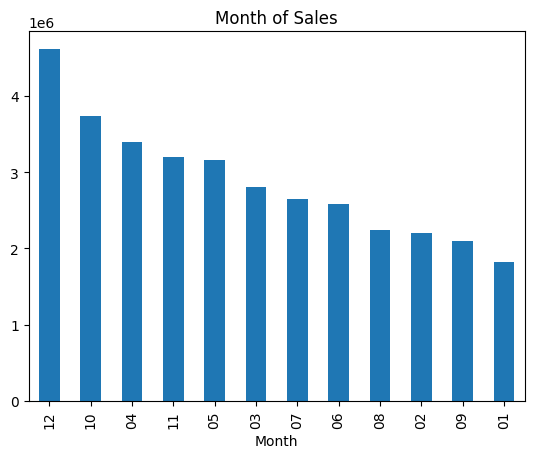

In [ ]:
# Bar plot to show highest sales

ax = new_df_high.plot(kind='bar', title= 'Month of Sales')

ANS: The best month is December probably owing to festivity hence sales ae always huge

Q2. What US city has the highest sales?


In [ ]:
# create a new column: City
# df['firstname'] = df['name'].str.split(' ').str[0]
new_df['City'] = new_df['Purchase Address'].str.split(',').str[1]

new_df.head()

<ipython-input-19-ba486d616952>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['City'] = new_df['Purchase Address'].str.split(',').str[1]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


In [ ]:
# Create two columns state & state_
new_df['State'] = new_df['Purchase Address'].str.split(', ').str[2]
new_df['State_'] = new_df['State'].str.split(' ').str[0]
new_df.head()

<ipython-input-20-81c35ca2b5c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['State'] = new_df['Purchase Address'].str.split(', ').str[2]
<ipython-input-20-81c35ca2b5c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['State_'] = new_df['State'].str.split(' ').str[0]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,State,State_
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,TX 75001,TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,MA 02215,MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,CA 90001,CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA 90001,CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA 90001,CA


In [ ]:
# merge city and state together
new_df['City State'] = new_df['City'] + ' ' + new_df['State_']
new_df.head()

<ipython-input-21-6ba051c027ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['City State'] = new_df['City'] + ' ' + new_df['State_']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,State,State_,City State
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,TX 75001,TX,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,MA 02215,MA,Boston MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,CA 90001,CA,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA 90001,CA,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,CA 90001,CA,Los Angeles CA


In [ ]:
# drop city, state, state_
new_df1 = new_df.drop(['City', 'State', 'State_'], axis=1)
new_df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City State
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA


In [ ]:
# Total price
new_df1.groupby('City State')['Total Price'].sum()

City State
 Atlanta GA          2795498.58
 Austin TX           1819581.75
 Boston MA           3661642.01
 Dallas TX           2767975.40
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Portland ME          449758.27
 Portland OR         1870732.34
 San Francisco CA    8262203.91
 Seattle WA          2747755.48
Name: Total Price, dtype: float64

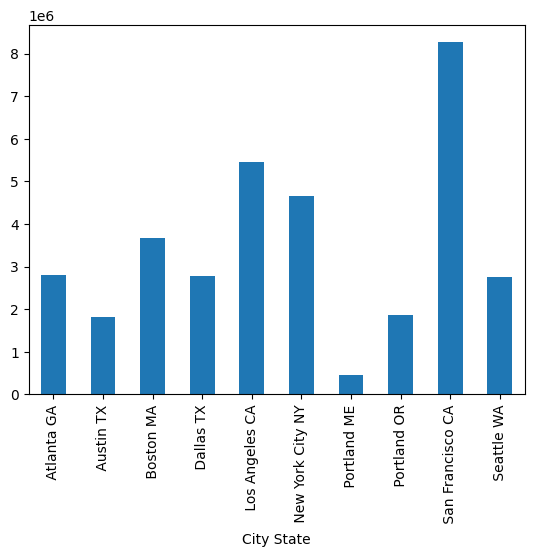

In [ ]:
# city with highest sales
new_df1.groupby('City State')['Total Price'].sum().plot(kind='bar');

ANS: San francisco CA

Q3: What time should we display advertisements to maximize likelihood of customers buying products?

In [ ]:
 # extract time from 'order date' column 

new_df1['Time'] = new_df1['Order Date'].str[9:14]
new_df1['Time_']= new_df1['Time'].str.split(':').str[0]

new_df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City State,Time,Time_
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,08:46,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22:30,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14:38,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14:38,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,09:27,09


In [ ]:
new_df1['Time_'] = new_df1['Time_'].astype('int')
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
 7   Total Price       185950 non-null  float64
 8   City State        185950 non-null  object 
 9   Time              185950 non-null  object 
 10  Time_             185950 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 17.0+ MB


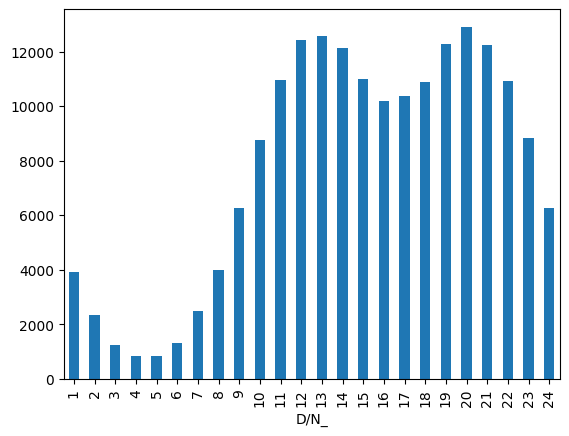

In [ ]:

new_df1['D/N_'] = pd.cut(new_df1['Time_'], bins=24, labels=[1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
new_df1.groupby('D/N_')['Total Price'].count().plot(kind='bar');

ANS: 12th and 14th of the day. 19th and 22nd hour of the day.